In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [456]:
df = pd.read_csv('train_loan.csv')

In [457]:
df.shape

(614, 13)

In [458]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [459]:
df.describe()
# From the description its clear that

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [461]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [462]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)

In [463]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [464]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [465]:
#Handling the missing values
## df.fillna(method='bfill',inplace=True)

### Data Exploration & Visualization 

In [466]:
#Find the replation btw Gender & Loan_Status
df.groupby('Gender').sum()['LoanAmount']

Gender
Female    14249.236486
Male      75647.831081
Name: LoanAmount, dtype: float64

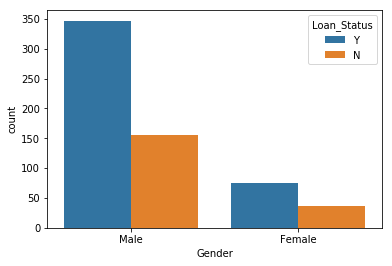

In [467]:
sns.countplot(x = 'Gender',hue= 'Loan_Status', data = df )

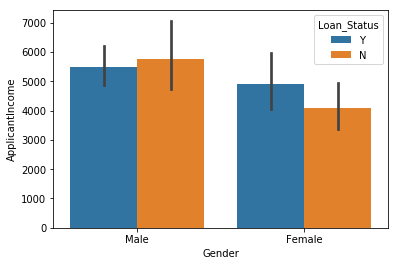

In [468]:
sns.barplot(x = 'Gender', y = 'ApplicantIncome', hue = 'Loan_Status', data = df)

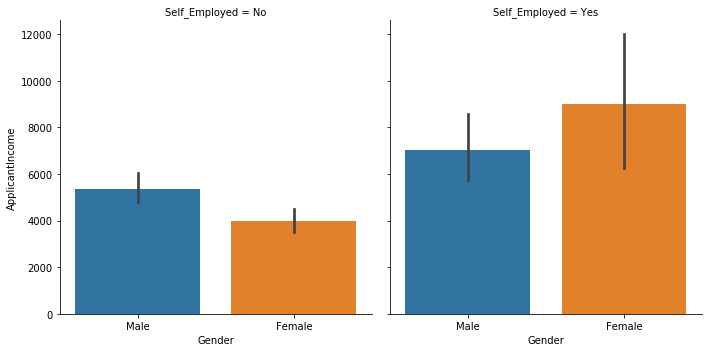

In [469]:
sns.catplot(x = 'Gender', y = 'ApplicantIncome', col = 'Self_Employed', data = df, kind='bar')

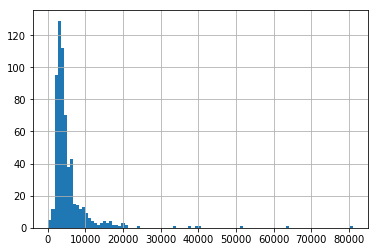

In [470]:
df['ApplicantIncome'].hist(bins = 100)
# Most of the Applicant income lies btw 0-10000

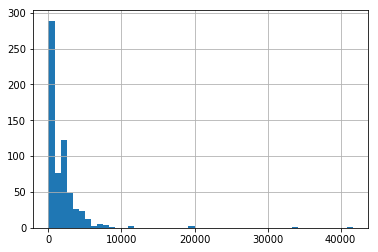

In [471]:
df['CoapplicantIncome'].hist(bins = 50)
# It is almost similar to the applicant income

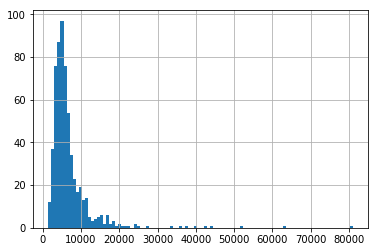

In [472]:
# Its better to create a total income column as the income of applicant and coapplicant are in similar range.
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income'].hist(bins=100)
df.drop(['ApplicantIncome','CoapplicantIncome'], inplace=True,axis=1)

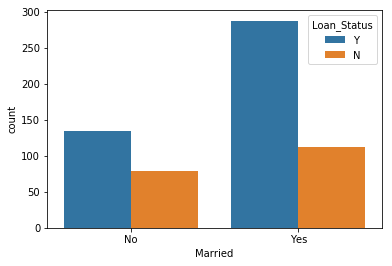

In [473]:
sns.countplot(x = 'Married', hue='Loan_Status', data=df)

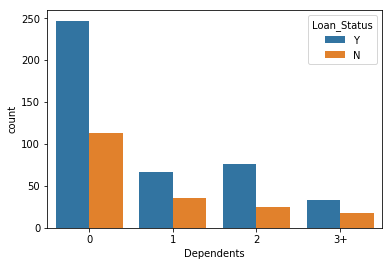

In [474]:
sns.countplot(x = 'Dependents', hue= 'Loan_Status', data=df)

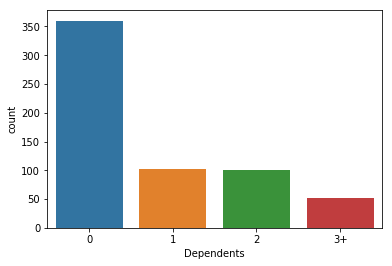

In [475]:
sns.countplot(x='Dependents',data=df)

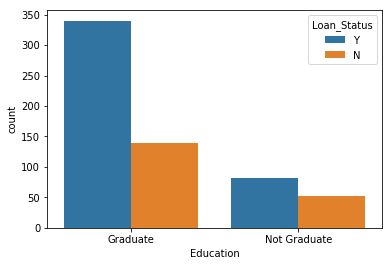

In [476]:
sns.countplot(x = 'Education', hue='Loan_Status', data=df)

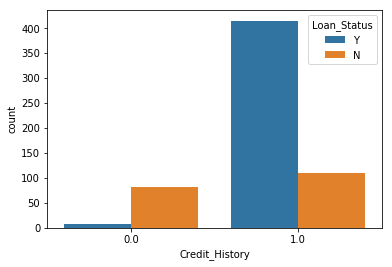

In [477]:
sns.countplot(x ='Credit_History', hue= 'Loan_Status', data=df)

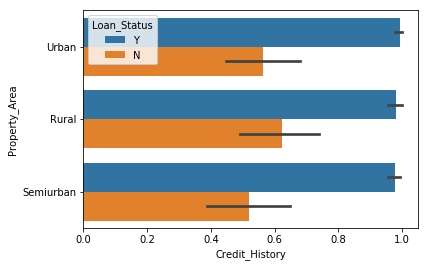

In [478]:
sns.barplot(x ='Credit_History',y ='Property_Area',hue= 'Loan_Status', data=df, orient='V')

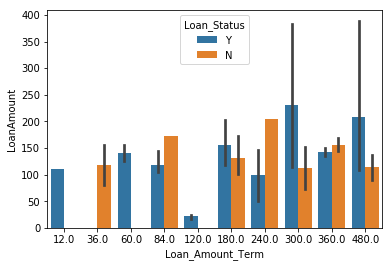

In [479]:
sns.barplot(x='Loan_Amount_Term', y = 'LoanAmount', data=df, hue='Loan_Status')

In [480]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


In [481]:
# Changing the categorical variables to continuous / discrete values
df['Gender'] = df.iloc[:,1].map({'Male':1,'Female':0})
df['Married'] = df.iloc[:,2].map({'Yes':1, 'No':0})
df['Education'] =df.iloc[:,4].map({'Not Graduate':0, 'Graduate':1})
df['Self_Employed'] = df.iloc[:,5].map({'Yes':1, 'No':0})
df['Property_Area'] = df.iloc[:,9].map({'Rural':0, 'Semiurban':1, 'Urban':2})
df['Loan_Status'] = df.iloc[:,10].map({'Y':1, 'N':0})

In [482]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
609,LP002978,0,0,0,1,0,71.0,360.0,1.0,0,1,2900.0
610,LP002979,1,1,3+,1,0,40.0,180.0,1.0,0,1,4106.0
611,LP002983,1,1,1,1,0,253.0,360.0,1.0,2,1,8312.0
612,LP002984,1,1,2,1,0,187.0,360.0,1.0,2,1,7583.0
613,LP002990,0,0,0,1,1,133.0,360.0,0.0,1,0,4583.0


In [483]:
# In the dependents column, there are values like 3+. We need to change it.
df['Dependents'] = df['Dependents'].str.replace('+','')
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [484]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
609,LP002978,0,0,0,1,0,71.0,360.0,1.0,0,1,2900.0
610,LP002979,1,1,3,1,0,40.0,180.0,1.0,0,1,4106.0
611,LP002983,1,1,1,1,0,253.0,360.0,1.0,2,1,8312.0
612,LP002984,1,1,2,1,0,187.0,360.0,1.0,2,1,7583.0
613,LP002990,0,0,0,1,1,133.0,360.0,0.0,1,0,4583.0


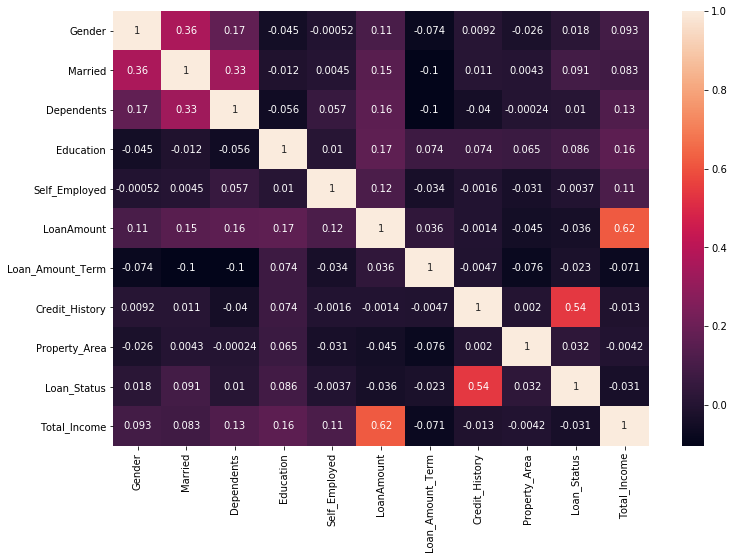

In [485]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [486]:
Y = df['Loan_Status']
X = df.drop(['Loan_ID','Loan_Status'],axis=1)

In [487]:
# Split the dataset into test and train
from sklearn.model_selection import train_test_split

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [489]:
# For model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier     
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC   

In [493]:
# Using Logistic Regression
lmg = LogisticRegression()
log_model = lmg.fit(X_train,y_train)
log_model.score(X_test,y_test)

0.7980295566502463

In [494]:
from sklearn.metrics import accuracy_score

In [495]:
log_model_pred = log_model.predict(X_test)
accuracy_score(y_test,log_model_pred)

0.7980295566502463

In [427]:
# Using Support Vector Machine
svm = SVC()
svm_model = svm.fit(X_train,y_train)
svm_model.score(X_test,y_test)

0.6502463054187192

In [442]:
# Using Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree_model = dtree.fit(X_train,y_train)
dtree_model.score(X_test,y_test)

0.7832512315270936

In [446]:
# Using K Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train,y_train)
knn_model.score(X_test,y_test)

0.5862068965517241

In [449]:
# Using GradientBoosting Classifier
gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=2)
gb_model = gb.fit(X_train,y_train)
gb_model.score(X_test,y_test)

0.8078817733990148

In [450]:
# Using Random forest Classifiers
rf = RandomForestClassifier(n_estimators=400, max_depth=5)
rf_model = rf.fit(X_train,y_train)
rf_model.score(X_test,y_test)

0.8029556650246306

In [451]:
pd.Series(rf_model.feature_importances_, X_train.columns).sort_values(ascending = False)

Credit_History      0.507272
Total_Income        0.160585
LoanAmount          0.116782
Loan_Amount_Term    0.060876
Property_Area       0.054071
Dependents          0.031177
Married             0.028003
Gender              0.016464
Education           0.014299
Self_Employed       0.010470
dtype: float64

In [452]:
# We can use the top 3 features for the model betterment
Y = df['Loan_Status']
X = df[['Credit_History','Total_Income','LoanAmount']]

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [454]:
rf = RandomForestClassifier(n_estimators=400,max_depth=5)
rf_model = rf.fit(X_train,y_train)
rf_model.score(X_test,y_test)

0.7881773399014779

In [ ]:
# The best model obtained is by using GradientBoosting algorithm.